In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

TODO:

- Double chek all dates are datetimes
- Pickle data
- Function showing how many films are between two dates (could be usefull later)


In [3]:
colnames_charac=['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date', 'Character name', 'Actor date of birth', 'Actor gender', 'Actor height', 'Actor ethnicity', 'Actor name', 'Actor age', 'Freebase character/actor map ID', 'Freebase character ID', 'Freebase actor ID'] 
meta_charac = pd.read_csv('Data/MovieSummaries/character.metadata.tsv', names=colnames_charac, sep='\t')

colnames_movie=['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres'] 
meta_movie = pd.read_csv('Data/MovieSummaries/movie.metadata.tsv', names=colnames_movie, sep='\t')

colnames_plot=['Wikipedia movie ID', 'Plot'] 
plot = pd.read_csv('Data/MovieSummaries/plot_summaries.txt', names=colnames_plot, sep="\t")

In [14]:
meta_movie

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000.0
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988.0
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987.0
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983.0
...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011.0
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011.0
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972.0
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992.0


C:\Users\kelan\AppData\Local\Temp\ipykernel_21240\1916441240.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(missing_movie.index,rotation=90)
C:\Users\kelan\AppData\Local\Temp\ipykernel_21240\1916441240.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(missing_char.index,rotation=90)
C:\Users\kelan\AppData\Local\Temp\ipykernel_21240\1916441240.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(missing_plot.index,rotation=90)


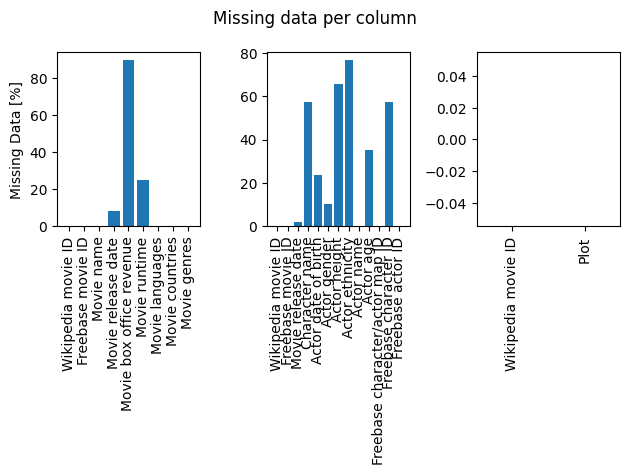

In [5]:
missing_movie = meta_movie.isnull().sum() * 100 / len(meta_movie)
missing_char = meta_charac.isnull().sum() * 100 / len(meta_charac)
missing_plot = plot.isnull().sum() * 100 / len(plot)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Missing data per column')
ax1.set(ylabel= 'Missing Data [%]')

ax1.bar(missing_movie.index, missing_movie.values)
ax1.set_xticklabels(missing_movie.index,rotation=90)
ax2.bar(missing_char.index, missing_char.values)
ax2.set_xticklabels(missing_char.index,rotation=90)
ax3.bar(missing_plot.index, missing_plot.values)
ax3.set_xticklabels(missing_plot.index,rotation=90)
plt.tight_layout()
plt.show()

In [6]:
def parse_date(date_str):
    try:
        # Try parsing as 'YYYY-MM-DD' format first
        return pd.to_datetime(date_str, format='%Y')
    except ValueError:
        try:
            # Try parsing as 'YYYY' format
            return pd.to_datetime(date_str, format='%Y-%m-%d')
        except ValueError:
            try:
                # Try parsing as 'YYYY' format
                return pd.to_datetime(date_str, format='%Y-%m')
            except ValueError:
            # If parsing fails, return NaT (Not a Timestamp)
                return pd.NaT

meta_movie['Movie release date'] = meta_movie['Movie release date'].apply(parse_date)

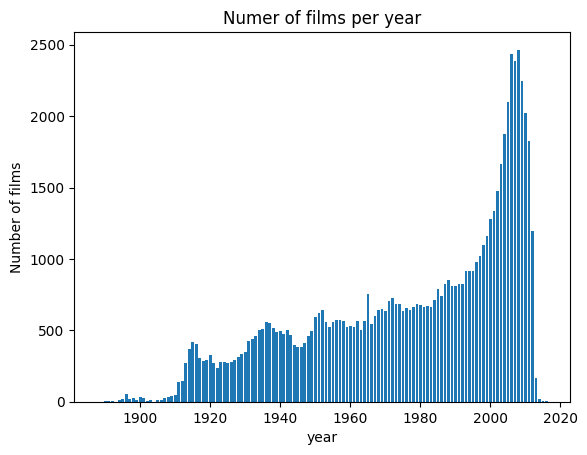

In [7]:
movie_counts = meta_movie['Freebase movie ID'].groupby(meta_movie['Movie release date'].dt.year).count()
plt.bar(movie_counts.index,movie_counts.values)
plt.title('Numer of films per year')
plt.xlabel('year')
plt.ylabel('Number of films')
plt.show()

In [8]:
imdb_raitings = pd.read_csv('Data/IMDb_Raiting.tsv', names=['tconst','averageRating','numVotes'] , sep='\t')
imdb_raitings.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.7,2003
1,tt0000002,5.8,269
2,tt0000003,6.5,1898
3,tt0000004,5.5,178
4,tt0000005,6.2,2684
5,tt0000006,5.0,183
6,tt0000007,5.4,839
7,tt0000008,5.4,2147
8,tt0000009,5.3,207
9,tt0000010,6.9,7331


In [9]:
imdb_title = pd.read_csv('Data/IMDb_Title.tsv', names=['tconst','titleType','primaryTitle','originalTitle','isAdult','startYear','endYear','runtimeMinutes','genres'] , sep='\t')
imdb_title.head()

C:\Users\kelan\AppData\Local\Temp\ipykernel_21240\4018894494.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_title = pd.read_csv('Data/IMDb_Title.tsv', names=['tconst','titleType','primaryTitle','originalTitle','isAdult','startYear','endYear','runtimeMinutes','genres'] , sep='\t')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [10]:
imdb_title2 = imdb_title[imdb_title['titleType'] == 'movie'].copy()
imdb_title2 = imdb_title2[imdb_title2['startYear'] != '\\N']
imdb_title2['startYear'] = imdb_title2['startYear'].astype(float)
meta_movie['year'] = meta_movie['Movie release date'].dt.year

In [11]:
test = meta_movie.merge(imdb_title2, left_on= ['Movie name', 'year'], right_on= ['primaryTitle','startYear'], how= 'inner')
test

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,year,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,tt0228333,movie,Ghosts of Mars,Ghosts of Mars,0,2001.0,\N,98,"Action,Horror,Sci-Fi"
1,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988.0,tt0094806,movie,Brun bitter,Brun bitter,0,1988.0,\N,83,"Crime,Drama"
2,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983.0,tt0083949,movie,A Woman in Flames,Die flambierte Frau,0,1983.0,\N,106,Drama
3,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938.0,tt0029852,movie,Alexander's Ragtime Band,Alexander's Ragtime Band,0,1938.0,\N,106,"Drama,Music,Musical"
4,9997961,/m/06_y2j7,Contigo y aquí,1974-01-01,NaN,NaN,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0jgd"": ""Argentina""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",...",1974.0,tt0200545,movie,Contigo y aquí,Contigo y aquí,0,1974.0,\N,70,"Comedy,Drama,Musical"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43216,15394941,/m/03m6zh4,Gopi Kishan,1994-12-02,NaN,NaN,"{""/m/03k50"": ""Hindi Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama"", ""/m/02kdv5l"": ""Action""...",1994.0,tt0109922,movie,Gopi Kishan,Gopi Kishan,0,1994.0,\N,161,"Action,Comedy,Drama"
43217,31353375,/m/0gkz70w,The Luck of the Navy,1927-11-22,NaN,110.0,{},"{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/06ppq"": ""Silent ...",1927.0,tt0333838,movie,The Luck of the Navy,The Luck of the Navy,0,1927.0,\N,110,"Action,Drama"
43218,23851782,/m/06_vb43,The Ghost Train,1941-05-03,NaN,82.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",1941.0,tt0033660,movie,The Ghost Train,The Ghost Train,0,1941.0,\N,85,"Comedy,Horror"
43219,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011.0,tt1606259,movie,Knuckle,Knuckle,0,2011.0,\N,97,"Biography,Documentary,Drama"


In [13]:
test2 = test.merge(imdb_raitings, how ='inner')
test2

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,year,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,...,movie,Ghosts of Mars,Ghosts of Mars,0,2001.0,\N,98,"Action,Horror,Sci-Fi",4.9,56817
1,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988.0,...,movie,Brun bitter,Brun bitter,0,1988.0,\N,83,"Crime,Drama",5.6,40
2,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983.0,...,movie,A Woman in Flames,Die flambierte Frau,0,1983.0,\N,106,Drama,6.0,621
3,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938.0,...,movie,Alexander's Ragtime Band,Alexander's Ragtime Band,0,1938.0,\N,106,"Drama,Music,Musical",6.8,2264
4,175026,/m/017n1p,Sarah and Son,1930-01-01,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama"", ""/m/01g6gs"": ""Black-an...",1930.0,...,movie,Sarah and Son,Sarah and Son,0,1930.0,\N,86,"Drama,Romance",5.4,298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39951,3868432,/m/0b44p5,Into the Mirror,2003-08-14,NaN,113.0,"{""/m/02hwhyv"": ""Korean Language""}","{""/m/06qd3"": ""South Korea""}","{""/m/03npn"": ""Horror""}",2003.0,...,movie,Into the Mirror,Geoul sokeuro,0,2003.0,\N,113,"Action,Fantasy,Horror",6.4,3577
39952,15394941,/m/03m6zh4,Gopi Kishan,1994-12-02,NaN,NaN,"{""/m/03k50"": ""Hindi Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama"", ""/m/02kdv5l"": ""Action""...",1994.0,...,movie,Gopi Kishan,Gopi Kishan,0,1994.0,\N,161,"Action,Comedy,Drama",5.8,962
39953,23851782,/m/06_vb43,The Ghost Train,1941-05-03,NaN,82.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",1941.0,...,movie,The Ghost Train,The Ghost Train,0,1941.0,\N,85,"Comedy,Horror",6.2,1580
39954,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011.0,...,movie,Knuckle,Knuckle,0,2011.0,\N,97,"Biography,Documentary,Drama",6.8,3190
